## Exploratory Data Analysis Project on Soft Drink Soda Sales (EDA) 

### Overview 
- This Softdrink sales project contain the track sales of various beverages 
in United state of Americca from three different companies break down e.g sales, cost and profit by product,category and customer location. Each row represent a unique product sold in a particular region.

### A. Business Objectives

- 1. What is the total revenue generated by each company?
- 2. Which product is the most sold based on units sold?
- 3. What is the profit margin by company (Profit as a percentage of Revenue)?
- 4. Which states have the highest sales in terms of revenue?
- 5. What is the relationship between units sold and profit?
- 6. Which product categories generate the most revenue?

### B. Data Analysis
##### Our dataset  for this project was been download from [data.world.org](https://data.world/vizwiz/sample-soda-sales)
#### with title: Soft_drink _soda _sales
- Import Required library
- Cleaning of the dataset
- Exploratory Analysis
- Description Analysis


### C. Present  Finding And Recommendation

### Data Analysis

#### 1. Import the Required Library

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Data Collection

In [16]:
df = pd.read_excel('Soft_Drink_Dataset.xlsx')

In [17]:
# First five row of our data
df.head()

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Purchase Date,Customer Name,Customer State,Customer City,Customer Zip Code,Order ID
0,Coffee,Coca-Cola,Coffee,151,2141,4956,-2815,2020-07-04,Angela Wilson,California,East Danielleview,35273,1-143-51064-X
1,Coffee,Coca-Cola,Coffee,624,1620,1156,464,2021-04-09,Zachary Wheeler,Wisconsin,New Kimberlyshire,55509,1-163-25655-2
2,Wine,Coca-Cola,Alcoholic,853,9978,1030,8948,2022-03-10,Jeremy Arroyo,Massachusetts,Vickieshire,93236,0-345-30366-0
3,Green Tea,Dr. Pepper,Tea,962,5974,5279,695,2023-05-10,Andrew Fleming,Arizona,Albertberg,34895,1-4844-8219-0
4,Vodka,Dr. Pepper,Alcoholic,719,3928,2828,1100,2020-11-19,Caroline Smith,Indiana,Johnsonstad,90201,1-85816-387-0


In [4]:
# last five of dataset
df.tail()

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Purchase Date,Customer Name,Customer State,Customer City,Customer Zip Code,Order ID
9995,Wine,Dr. Pepper,Alcoholic,337,6676,1932,4744,2020-02-15,Kyle Morris,New Mexico,Heatherbury,80789,0-7733-9949-6
9996,Green Tea,Coca-Cola,Tea,745,1096,1603,-507,2023-02-02,Jacqueline Mendez,Tennessee,South Charles,42497,0-13-801494-9
9997,Energy Drink,Pepsi,Soft Drink,728,4703,5135,-432,2020-01-14,Taylor Robinson,Virginia,West Susanchester,13202,1-893420-14-0
9998,Cola,Coca-Cola,Soft Drink,142,3655,6436,-2781,2022-10-28,Sierra Morrison,Montana,Perezfort,66758,1-5413-2685-7
9999,Lemonade,Coca-Cola,Soft Drink,703,7202,5593,1609,2021-10-09,Joanna Mendez,Utah,Leonbury,64499,0-03-548200-1


#### 3. Data Preprocessing

In [18]:
df.columns

Index(['Product', 'Company', 'Category', 'Units Sold', 'Revenue',
       'Cost of Goods Sold', 'Profit', 'Purchase Date', 'Customer Name',
       'Customer State', 'Customer City', 'Customer Zip Code', 'Order ID'],
      dtype='object')

In [19]:
df.shape

(10000, 13)

In [20]:
# Let check for null in the dataset
df.isnull().sum()

Product               0
Company               0
Category              0
Units Sold            0
Revenue               0
Cost of Goods Sold    0
Profit                0
Purchase Date         0
Customer Name         0
Customer State        0
Customer City         0
Customer Zip Code     0
Order ID              0
dtype: int64

In [21]:
# Let the columns we do not want 
df.drop(columns = ['Purchase Date','Customer Name','Customer City','Customer Zip Code','Order ID'], inplace = True)

In [22]:
# The first five of row after droping our columns that do not want
df.head()

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Customer State
0,Coffee,Coca-Cola,Coffee,151,2141,4956,-2815,California
1,Coffee,Coca-Cola,Coffee,624,1620,1156,464,Wisconsin
2,Wine,Coca-Cola,Alcoholic,853,9978,1030,8948,Massachusetts
3,Green Tea,Dr. Pepper,Tea,962,5974,5279,695,Arizona
4,Vodka,Dr. Pepper,Alcoholic,719,3928,2828,1100,Indiana


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             10000 non-null  object
 1   Company             10000 non-null  object
 2   Category            10000 non-null  object
 3   Units Sold          10000 non-null  int64 
 4   Revenue             10000 non-null  int64 
 5   Cost of Goods Sold  10000 non-null  int64 
 6   Profit              10000 non-null  int64 
 7   Customer State      10000 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [25]:
# Let confirm if we are still having missed record dataset
df.isna().any()

Product               False
Company               False
Category              False
Units Sold            False
Revenue               False
Cost of Goods Sold    False
Profit                False
Customer State        False
dtype: bool

In [26]:
# Let confirm if their is any new dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [27]:
# let find the statistic our dataset
df.describe()

,Units Sold,Revenue,Cost of Goods Sold,Profit
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,547.162400,5507.824100,4244.766500,1263.057600
std,260.392451,2591.286638,2158.872391,3344.636747
min,100.000000,1000.000000,500.000000,-6961.000000
25%,323.000000,3283.250000,2380.500000,-1177.250000
50%,541.000000,5517.000000,4268.000000,1243.500000
75%,772.250000,7757.500000,6095.000000,3659.000000
max,1000.000000,9999.000000,8000.000000,9461.000000


In [28]:
# Let find the unique category of our dataset
df['Product'].unique()

array(['Coffee', 'Wine', 'Green Tea', 'Vodka', 'Lemonade', 'Cola',
       'Energy Drink', 'Herbal Tea', 'Beer', 'Black Tea'], dtype=object)

In [29]:
# Let find the unique category of our dataset
df['Company'].unique()

array(['Coca-Cola', 'Dr. Pepper', 'Pepsi'], dtype=object)

In [31]:
# Let find the unique category of our datase
# Let find the unique category of our dataset
df['Category'].unique()

array(['Coffee', 'Alcoholic', 'Tea', 'Soft Drink'], dtype=object)

### C. Present  Finding And Recommendation

#### 1.  Answering Business Question And Finding

- Question 1. What is the total revenue generated by each company?

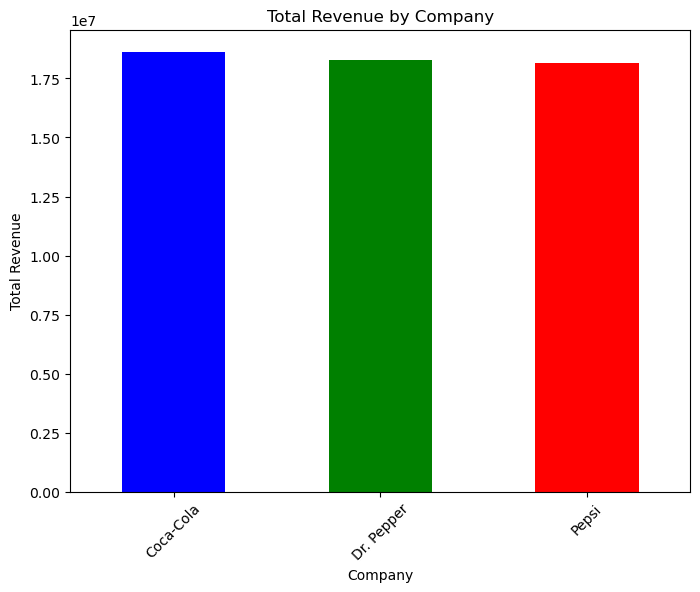

In [45]:
# We need to group the company and sum the revenue by applying bar chart

# Plotting
company_revenue = df.groupby('Company')['Revenue'].sum()

plt.figure (figsize =(8,6))
company_revenue.plot(kind ='bar', color =['blue','green','red'])
plt.title('Total Revenue by Company')
plt.xlabel('Company')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

- Question 2. Which product is the most sold based on units sold?

The most sold product is Green Tea with 569303 units sold.


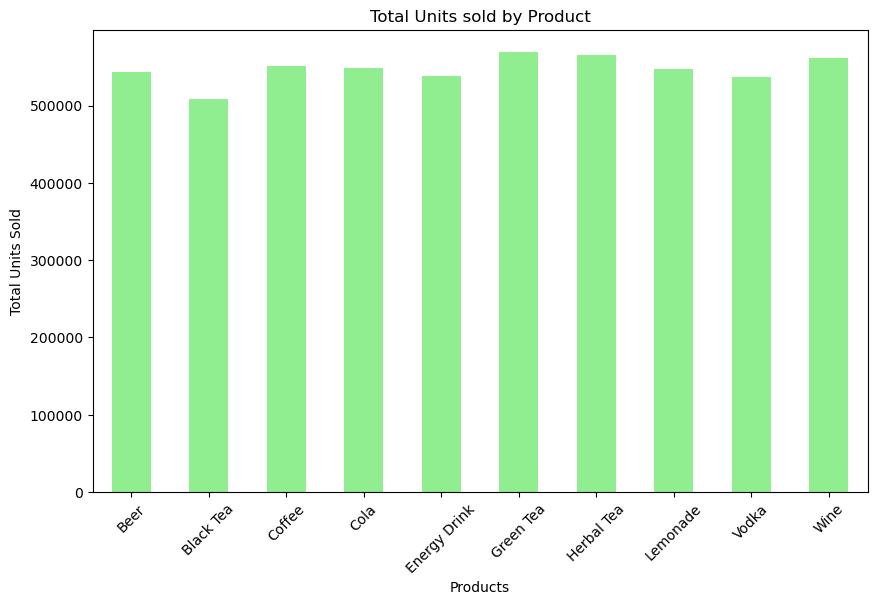

In [48]:
# Here we need to first and formost also have to group by product and sum the unit sold 

product_units_sold = df.groupby('Product')['Units Sold'].sum()

# then we will now sort the values to find the product with highest unit sold

most_sold_product = product_units_sold.idxmax()
max_units_sold = product_units_sold.max()

print(f'The most sold product is {most_sold_product} with {max_units_sold} units sold.')

# Plotting our total units sold for all product 
plt.figure (figsize =(10,6))
product_units_sold.plot(kind ='bar', color =['lightgreen'])
plt.title('Total Units sold by Product')
plt.xlabel('Products')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()



- Question 3. What is the profit margin by company (Profit as a percentage of Revenue)?

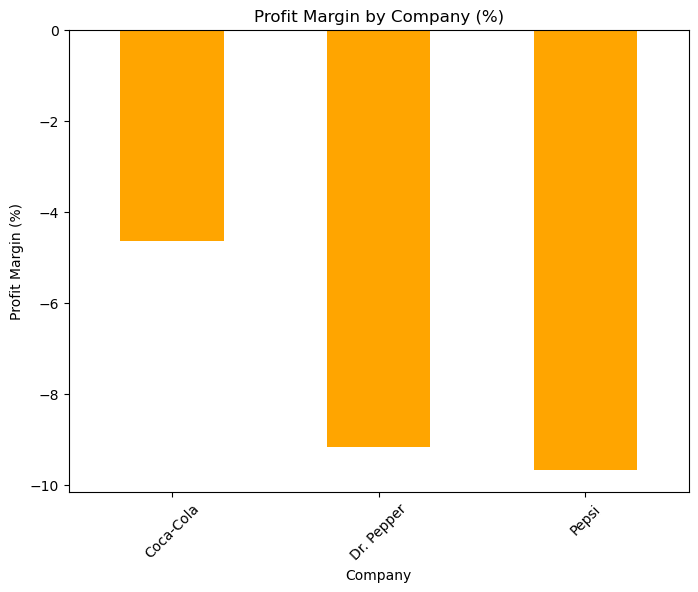

In [51]:
# Let us calculate the profit marging for each company

df['Profit Margin']= df['Profit']/df['Revenue']* 100

# Let also go throuh groupby and then we calculate mean profit margin 

company_profit_margin = df.groupby('Company')['Profit Margin'].mean()

# Plotting 
plt.figure (figsize =(8,6))
company_profit_margin.plot(kind ='bar', color ='Orange')
plt.title('Profit Margin by Company (%)')
plt.xlabel('Company')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()


- Question 4. Which states have the highest sales in terms of revenue?

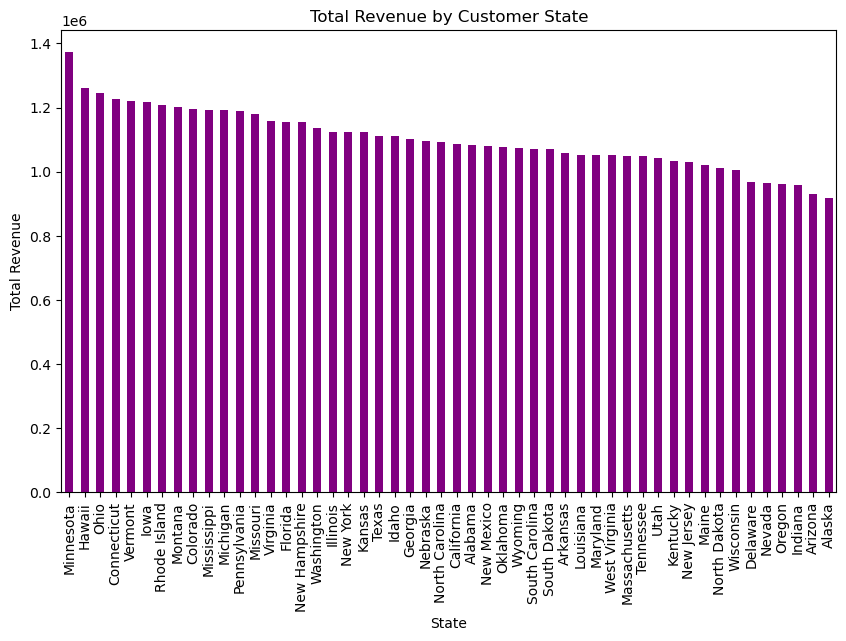

In [52]:
# So for this we will also going to use group by customer state and sum the revenue

state_revenue = df.groupby('Customer State')['Revenue'].sum()

# Then we sort the revenue to get the highest state revenue with this code

state_revenue_sorted = state_revenue.sort_values(ascending = False)

# Plotting 
plt.figure (figsize =(10,6))
state_revenue_sorted.plot(kind ='bar', color ='Purple')
plt.title('Total Revenue by Customer State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()



- Question 5. What is the relationship between units sold and profit?

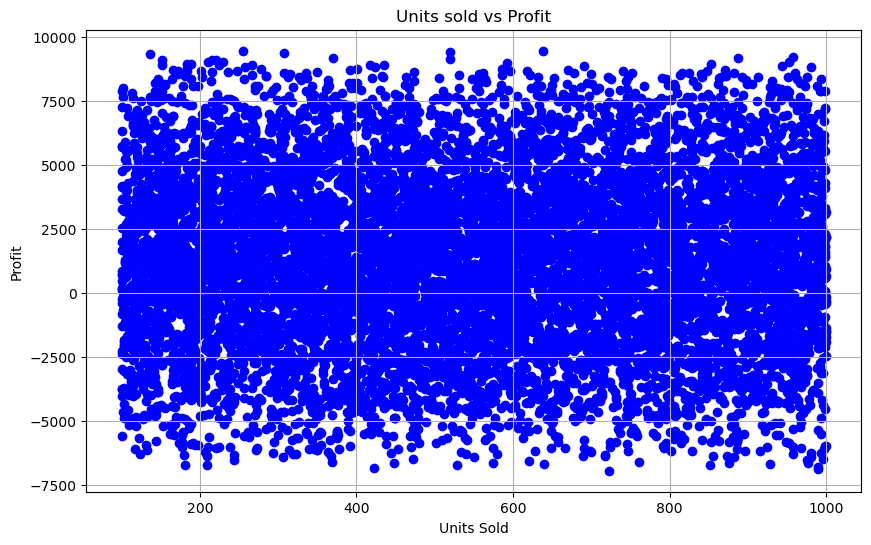

In [53]:
# Using Scatter Plot 

# Plotting 
plt.figure (figsize =(10,6))
plt.scatter(df['Units Sold'], df['Profit'], color ='blue')
plt.title('Units sold vs Profit')
plt.xlabel('Units Sold')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

- Question 6. Which product categories generate the most revenue?

Text(0.5, 1.0, 'Total Revenue by Product Category')

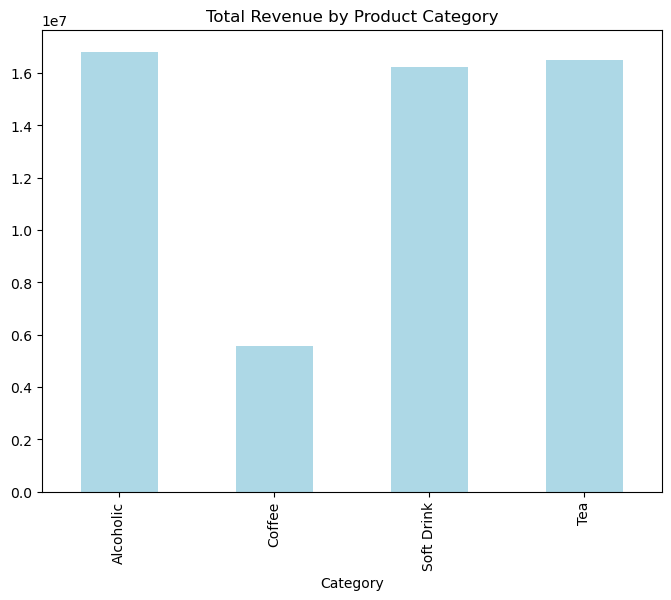

In [56]:
# Grouping by category and sum the revenue

category_revenue = df.groupby('Category')['Revenue'].sum()

# Plotting 
plt.figure (figsize =(8,6))
category_revenue.plot(kind ='bar', color ='lightblue')
plt.title('Total Revenue by Product Category')

### 2. Insight And Recommendation 
#### Based on this Exploratory data Analysis conducted, here some of the business insight and recomendationthat could be drawn below

## Maximise Revenue from Top Company
- Insight : As you can see that company like Coca-cola has highest or generate significant revenue compare to 
    Pepsi and Dr. Pepper
- Recommendation : if both firm come in partnership or co-branding they will maintain top high revenue by increasing their market share in the market

## Target Sales with high revenue 
- Insight: if we study graph above we can see some certain state like Minnesota, Hawaii and New York have 
highest revenue compare to Alaska and Arizona
- Recommendation: An increase marketing and distribution effort in high revenue state with loyalty or promotion
programe with local retailer will further increase high performing market more in those state 

## Balance between Unit Sold And Profit
- Insight: They are some products that sell in high volume but they don't necessary generate high profit
vice versa
- Recomendation: To strike a balance between volume-driven and profit-driven products. Ensure that products 
with high sales volume but low profit margins have an optimized supply chain or adjusted pricing strategies. 
For high-profit but low-volume products, explore ways to increase awareness and visibility. etc